# Guía 2: Evaluación de carros

**Elaborado por:** Juan Pablo Lozano Novoa

## Planteamiento del problema

## Conjunto de datos

Descripción general
El conjunto de datos de evaluación de automóviles es una colección de información sobre varios automóviles y se utiliza comúnmente para tareas de clasificación en aprendizaje automático. Contiene 1728 instancias y 6 atributos, que son:

compra: indica el costo del automóvil (bajo, med, alto, muy alto)
mantenimiento: indica el costo de mantenimiento del automóvil (bajo, med, alto, muy alto)
puertas: indica el número de puertas del automóvil (2, 3, 4, 5 o más)
personas: indica la capacidad del automóvil en términos de personas que pueden sentarse (2, 4, más)
maletero: indica el tamaño del maletero del automóvil (pequeño, med, grande)
seguridad: indica el nivel de seguridad del automóvil (bajo, med, alto)



## Metodología

En este notebook, se presenta un pipeline para analizar el conjunto de datos de evaluación de automóviles. Utilizaremos diferentes algoritmos de aprendizaje automático, como SVM, regresión logística y árboles de decisión, para clasificar los automóviles en función de sus atributos. Además, también cubriremos cómo manipular variables categóricas para preparar el conjunto de datos para el análisis.



## 1. Importación de las librerías necesarias y cargue del Dataset

Para empezar, importamos las librerías necesarias y cargamos el conjunto de datos.




In [1]:
#importaciones de las librerías necesarias para el ejercicio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [ ]:
ruta_csv = 'https://archive.ics.uci.edu/static/public/19/data.csv'

df = pd.read_csv(ruta_csv)

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## 2. Descripción del Data Set (Tipos de datos y Estadísticas Descriptivos)

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Obtener los tipos de datos de cada columna
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

## Preprocesamiento de Variables Categóricos

In [ ]:
# Generación de un resumen estadístico descriptivo del conjunto de datos
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


##

In [ ]:
# Codificar variables categóricas
df_encoded = pd.get_dummies(df)


In [ ]:
#Verificar las columnas de DF
print(df_encoded.columns)

Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med', 'class_acc', 'class_good', 'class_unacc',
       'class_vgood'],
      dtype='object')


In [ ]:
print(df_encoded.head())


   buying_high  buying_low  buying_med  buying_vhigh  maint_high  maint_low  \
0        False       False       False          True       False      False   
1        False       False       False          True       False      False   
2        False       False       False          True       False      False   
3        False       False       False          True       False      False   
4        False       False       False          True       False      False   

   maint_med  maint_vhigh  doors_2  doors_3  ...  lug_boot_big  lug_boot_med  \
0      False         True     True    False  ...         False         False   
1      False         True     True    False  ...         False         False   
2      False         True     True    False  ...         False         False   
3      False         True     True    False  ...         False          True   
4      False         True     True    False  ...         False          True   

   lug_boot_small  safety_high  safety_low  

In [ ]:
# Validación de la variable doors
pd.get_dummies(df['doors'])

,2,3,4,5more
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
1723,False,False,False,True
1724,False,False,False,True
1725,False,False,False,True
1726,False,False,False,True


In [ ]:
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.fit(df[['doors']].values)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.transform([['2'],['3'],['4'], ['5more']]).toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Regresión logística

## División del conjunto de datos en entrenamiento y prueba

Dividimos el conjunto de datos en dos subconjuntos: entrenamiento y prueba, con una proporción del 80% y 20%, respectivamente.

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Regresión logística
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Accuracy Regresión Logística:', accuracy_score(y_test, y_pred_lr))
print('Classification Report Regresión Logística:', classification_report(y_test, y_pred_lr))


Accuracy Regresión Logística: 0.6589595375722543
Classification Report Regresión Logística:               precision    recall  f1-score   support

           0       0.26      0.13      0.18        83
           1       0.00      0.00      0.00        11
           2       0.72      0.92      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La precisión (accuracy) del modelo es de aproximadamente 0.65, lo que indica que el modelo clasifica correctamente aproximadamente el 66% de las muestras en el conjunto de prueba.

En este caso, podemos ver que el modelo tiene un rendimiento relativamente bueno en la clase 2, con una precisión de 0.72, un recall de 0.92 y una puntuación F1 de 0.81. Sin embargo, el modelo tiene un rendimiento muy pobre en las clases 0, 1 y 3, con precisión y recall de 0 para las clases 1 y 3, y una precisión y recall muy bajas para la clase 0.

el modelo de regresión logística tiene un rendimiento mixto en la clasificación de los automóviles en el conjunto de datos. Mientras que el modelo tiene un buen rendimiento en la predicción de las clases 3 y 4, tiene dificultades para predecir correctamente las clases 1 y 2. Es posible que se necesiten más características o un modelo más complejo para mejorar el rendimiento en la clasificación de estas clases.



In [ ]:
pip install mglearn


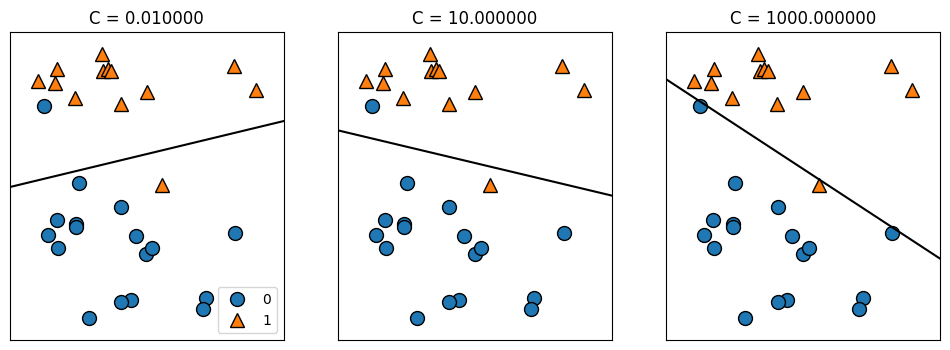

In [ ]:
import mglearn
mglearn.plots.plot_linear_svc_regularization()


## Support Vector Machine

1. Primer ejemplo usando un Kernel = lineal

In [ ]:
# Convertir variables categóricas a columnas one-hot
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('class', axis=1)
y = df['class']


In [ ]:
# Convertir columnas de cadena en numéricas
label_encoder = LabelEncoder()
df['buying'] = label_encoder.fit_transform(df['buying'])
df['maint'] = label_encoder.fit_transform(df['maint'])
df['doors'] = label_encoder.fit_transform(df['doors'])
df['persons'] = label_encoder.fit_transform(df['persons'])
df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])
df['safety'] = label_encoder.fit_transform(df['safety'])

In [ ]:
print(df)

      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       1  unacc
1          3      3      0        0         2       2  unacc
2          3      3      0        0         2       0  unacc
3          3      3      0        0         1       1  unacc
4          3      3      0        0         1       2  unacc
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      3        2         1       2   good
1724       1      1      3        2         1       0  vgood
1725       1      1      3        2         0       1  unacc
1726       1      1      3        2         0       2   good
1727       1      1      3        2         0       0  vgood

[1728 rows x 7 columns]


In [ ]:
# División del conjunto de datos
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Entrenamiento del modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# 6. Evaluación del modelo
y_pred = model.predict(X_test)
print('Precisión:', accuracy_score(y_test, y_pred))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))


Precisión: 0.6965317919075145
Matriz de confusión:
 [[  9   0  74   0]
 [  0   0  11   0]
 [  3   0 232   0]
 [  7   0  10   0]]


2. Ejemplo usando un Kernel SVM

In [ ]:
# Codifica todas las columnas de cadena
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
# Calcular la matriz de correlación
corr_matrix = df.corr()


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entrenar el modelo SVM con kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_encoded, y_train)


SVC(random_state=42)

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_encoded)


In [ ]:
# Evalúa la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.2f}")

Precisión del modelo SVM: 0.70


## Árbol de decisión

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [ ]:
print(df.describe())

            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.750000     0.750000     0.750000     0.000000     0.000000   
50%       1.500000     1.500000     1.500000     1.000000     1.000000   
75%       2.250000     2.250000     2.250000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     2.000000     2.000000   

            safety        class  
count  1728.000000  1728.000000  
mean      1.000000     1.553241  
std       0.816733     0.875948  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       1.000000     2.000000  
75%       2.000000     2.000000  
max       2.000000     3.000000  


In [ ]:
# Ver las primeras filas del conjunto de datos
print(df.head())


   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [ ]:
# Ver la distribución de las variables predictoras
df.iloc[:, :-1].apply(lambda x: x.value_counts()).T


,0,1,2,3
buying,432.0,432.0,432.0,432.0
maint,432.0,432.0,432.0,432.0
doors,432.0,432.0,432.0,432.0
persons,576.0,576.0,576.0,NaN
lug_boot,576.0,576.0,576.0,NaN
safety,576.0,576.0,576.0,NaN


## Preparar los datos para el modelado:



In [ ]:
# Separar las variables predictoras y la variable de respuesta
X = df.iloc[:, :-1]
y = df['safety']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Entrenamiento del Árbol de decisión

In [ ]:
# Crear un árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Evaluar el modelo

In [ ]:
# Predecir las clases para el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:\n', conf_matrix)

Precisión: 1.0
Matriz de confusión:
 [[166   0   0]
 [  0 169   0]
 [  0   0 184]]


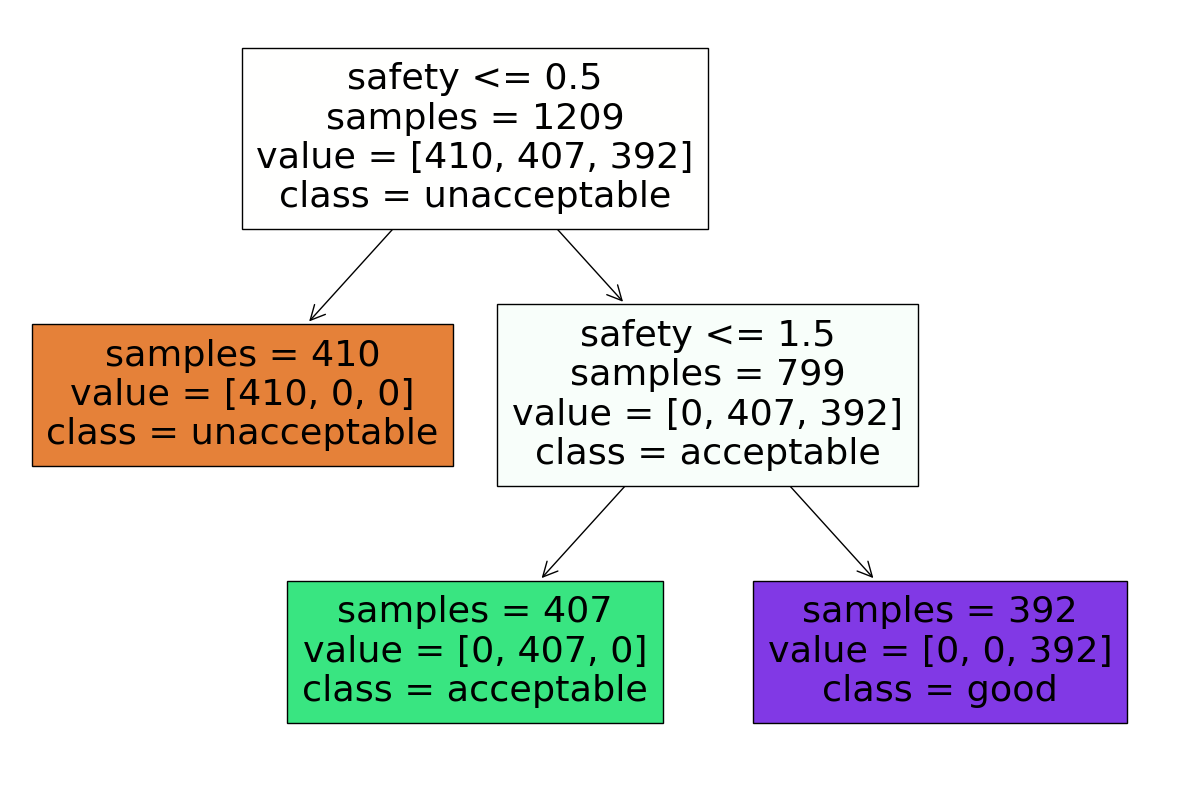

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['unacceptable', 'acceptable', 'good', 'very good'], filled=True, impurity=False);


En este orden de ideas:

El nodo raíz del árbol es la característica "safety". Si el valor de "safety" es menor o igual a 0.5, el árbol predice que la clase es "unacceptable" con una confianza de 1209/1209 (es decir, el 100% de los datos de entrenamiento en este nodo pertenecen a la clase "unacceptable").
•	Si el valor de "safety" es mayor a 0.5, el árbol sigue la rama derecha y evalúa la característica "safety" nuevamente, pero esta vez con un umbral diferente de 1.5. Si el valor de "safety" es menor o igual a 1.5, el árbol predice que la clase es "acceptable" con una confianza de 799/799 (es decir, el 100% de los datos de entrenamiento en este nodo pertenecen a la clase "acceptable").
•	Si el valor de "safety" es mayor a 1.5, el árbol sigue la rama derecha y predice que la clase es "good" con una confianza de 392/392 (es decir, el 100% de los datos de entrenamiento en este nodo pertenecen a la clase "good").




En términos de la distribución de las clases en los nodos hojas, el árbol predice que:

•	Si el valor de "safety" es menor o igual a 0.5, la clase es "unacceptable" con una confianza del 100%.
•	Si el valor de "safety" es mayor a 0.5 y menor o igual a 1.5, la clase es "acceptable" con una confianza del 100%.
•	Si el valor de "safety" es mayor a 1.5, la clase es "good" con una confianza del 100%. Este árbol de decisión sugiere que la característica "safety" es la más importante para predecir la clase objetivo en este conjunto de datos, y que los umbrales de 0.5 y 1.5 en esta característica son particularmente relevantes.